In [3]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import pyspark

In [33]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('dataframe').getOrCreate()

In [34]:
df_pyspark=spark.read.csv('/content/drive/MyDrive/Pypask_Course/test3.csv',header=True,inferSchema=True)

In [35]:
df_pyspark.show()


+---------+------------+------+
|     Name| Departments|salary|
+---------+------------+------+
|    Krish|Data Science| 10000|
|    Krish|         IOT|  5000|
|   Mahesh|    Big Data|  4000|
|    Krish|    Big Data|  4000|
|   Mahesh|Data Science|  3000|
|Sudhanshu|Data Science| 20000|
|Sudhanshu|         IOT| 10000|
|Sudhanshu|    Big Data|  5000|
|    Sunny|Data Science| 10000|
|    Sunny|    Big Data|  2000|
+---------+------------+------+



In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
archivo=df_pyspark.toPandas() #Conviertes datafram de Spark a Pandas Para poder manipularlo

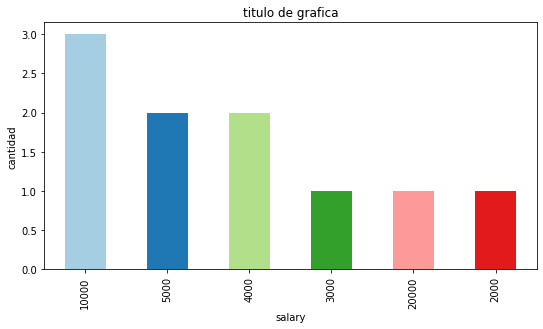

In [13]:
fig=plt.figure(figsize=(30,10))
plt.subplot2grid((2,3),(0,0))
paired_colors=plt.cm.Paired(range(len(archivo)))

#el valor visualizado
# SE VISUALLIZA ASI: archivo.{VARIABLE}........
archivo.salary.value_counts().plot(kind='bar',color=paired_colors)
plt.title('titulo de grafica')
plt.xlabel('salary')
plt.ylabel('cantidad')
plt.show()


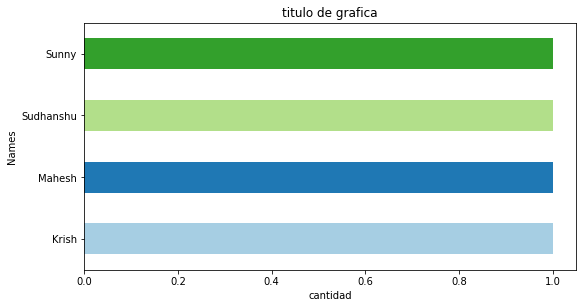

In [22]:
fig=plt.figure(figsize=(30,10))
plt.subplot2grid((2,3),(0,0))
paired_colors=plt.cm.Paired(range(len(archivo)))

#el valor visualizado
# SE VISUALLIZA ASI: archivo.{VARIABLE}........
archivo.Name[archivo.Departments == 'Data Science'].value_counts().plot(kind='barh',color=paired_colors)
plt.title('titulo de grafica')
plt.xlabel('cantidad')
plt.ylabel('Names')
plt.show()

<ipython-input-23-e7756e176c35>:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie((iot,dtasciense,bigdata),labels=labels , autopct='%1.1f%%')


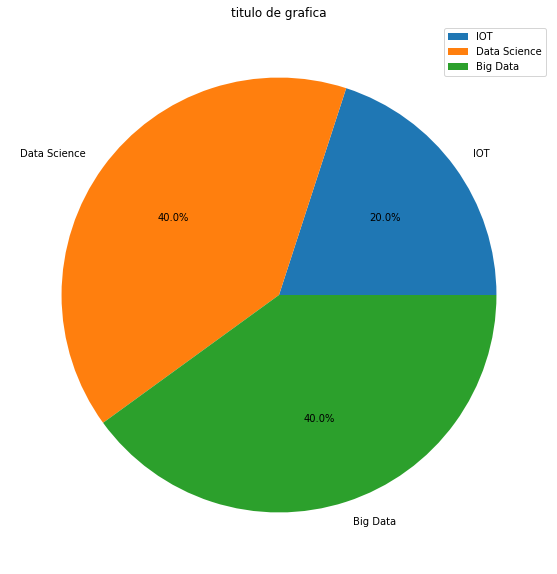

In [23]:
fig=plt.figure(figsize=(10,10))

iot=archivo.Departments[archivo.Departments=='IOT'].value_counts()
dtasciense=archivo.Departments[archivo.Departments=='Data Science'].value_counts()
bigdata=archivo.Departments[archivo.Departments=='Big Data'].value_counts()

labels='IOT','Data Science','Big Data'
paired_colors=plt.cm.Paired(range(len(archivo)))

plt.pie((iot,dtasciense,bigdata),labels=labels , autopct='%1.1f%%')
plt.title('titulo de grafica')
plt.legend()
plt.show()

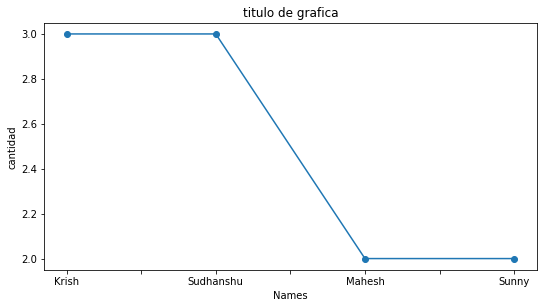

In [26]:
fig=plt.figure(figsize=(30,10))
plt.subplot2grid((2,3),(0,0))
paired_colors=plt.cm.Paired(range(len(archivo)))

#el valor visualizado
# SE VISUALLIZA ASI: archivo.{VARIABLE}........
archivo.Name.value_counts().plot(marker='o',linestyle='-')
plt.title('titulo de grafica')
plt.xlabel('Names')
plt.ylabel('cantidad')
plt.show()

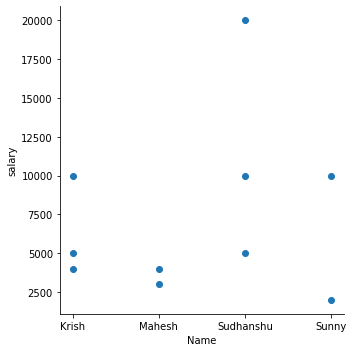

In [28]:
#grafico de dispersion 
import seaborn as sns

g=sns.FacetGrid(archivo,height=5 , aspect=1)
g=g.map(plt.scatter,"Name","salary")
plt.show()


termina los Servicios Spark , muy imrtante darlo al final o cuand se deba cerrarlo

In [30]:
pyspark.SparkContext(appName="App1", master="yarn").stop()

ValueError: ignored